In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import sys

sys.path.append('.\\..\\..\\..\\..')

from src.utils.Utils import save_answer

In [4]:
data = load_digits()
# cv=10
# k=10
data.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [5]:
X = data['data']
y = data['target']

[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]


In [9]:
clf = DecisionTreeClassifier()
score = cross_val_score(clf, X, y, cv=10).mean()

save_answer(1, score)


Task №1 answer 0.820829474728



In [11]:
from sklearn.ensemble import BaggingClassifier

classifier = DecisionTreeClassifier()
clf = BaggingClassifier(classifier, n_estimators=100)

score = cross_val_score(clf, X, y, cv=10).mean()

save_answer(2, score)


Task №2 answer 0.926088073788



In [20]:
import numpy as np

print(X.shape[1])
print(np.sqrt(X.shape[1]))
print(np.sqrt(X.shape[1]) / X.shape[1])

print(X.shape)

print(np.sqrt(X.shape[1]) / (X.shape[1] / 100))

64
8.0
0.125
(1797, 64)
12.5


In [23]:
import numpy as np

classifier = DecisionTreeClassifier()
clf = BaggingClassifier(classifier, n_estimators=100, max_features=np.sqrt(X.shape[1]) / X.shape[1])

score = cross_val_score(clf, X, y, cv=10).mean()

save_answer(3, score)


Task №3 answer 0.935431689721



In [24]:
classifier = DecisionTreeClassifier(max_features='sqrt')
clf = BaggingClassifier(classifier, n_estimators=100)

score = cross_val_score(clf, X, y, cv=10).mean()

save_answer(4, score)


Task №4 answer 0.948887590987



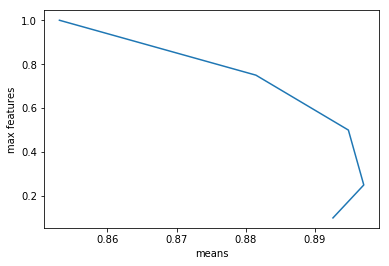

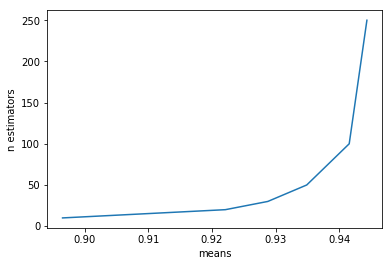

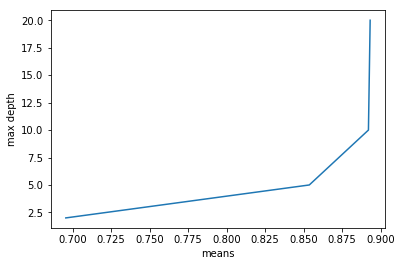


Task №5 answer [2, 3, 4, 7]

0.91544923352


In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
import matplotlib.pyplot as plt

parameters_grid = {
    'max_features' : [0.1, 0.25, 0.5, 0.75, 1]
}

clf = RandomForestClassifier()

grid = GridSearchCV(clf, parameters_grid)
grid.fit(X, y)

means = [gs[1] for gs in grid.grid_scores_]
max_features = [gs[0]['max_features'] for gs in grid.grid_scores_]

plt.plot(means, max_features)
plt.xlabel('means')
plt.ylabel('max features')
plt.show()


parameters_grid = {
    'n_estimators' : [10, 20, 30, 50, 100, 250]
}

clf = RandomForestClassifier()

grid = GridSearchCV(clf, parameters_grid)
grid.fit(X, y)

means = [gs[1] for gs in grid.grid_scores_]
n_estimators = [gs[0]['n_estimators'] for gs in grid.grid_scores_]

plt.plot(means, n_estimators)
plt.xlabel('means')
plt.ylabel('n estimators')
plt.show()

parameters_grid = {
    'max_depth' : [2, 5, 10, 20]
}

clf = RandomForestClassifier()

grid = GridSearchCV(clf, parameters_grid)
grid.fit(X, y)

means = [gs[1] for gs in grid.grid_scores_]
max_depth = [gs[0]['max_depth'] for gs in grid.grid_scores_]

plt.plot(means, max_depth)
plt.xlabel('means')
plt.ylabel('max depth')
plt.show()

save_answer(5, [2, 3, 4, 7], space=True)

clf = RandomForestClassifier()
score = cross_val_score(clf, X, y, cv=10).mean()

print(score)